# Modèle avec Xgboost

Pour faire simple XGBoost est une implémentation open source optimisée de l’algorithme d’arbres de boosting de gradient.
LeBoosting de Gradient est un algorithme d’apprentissage supervisé dont le principe et de combiner les résultats d’un ensemble de modèles plus simple et plus faibles afin de fournir une meilleur prédiction. 


il ne fait pas partie de scikitlearn il nous faut donc commencer par l'installer:
    
    PIP install xgboost

enfin nous pouvons commencer a travailler sur un jeu de données contenu dans sklearn il se compose de plusieurs images (8X8) de chiffres manuscrits de 0 à 9, il contient aussi la target

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

representation 2D de la valeur 0

In [2]:
images=digits.images
print(images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


representation plus jolie avec matplotlib

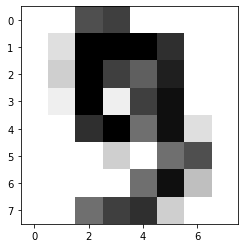

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[9],cmap='binary',interpolation='nearest')

visualitation 2D de la target, ici 9

In [4]:
targets=digits.target
print(targets[9])

9


le dataset est en 3D pour diviser en train et test on le passe en 1D

In [5]:
images=images.reshape(1797,8*8)

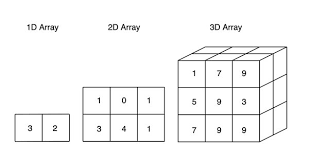

division x train x test y train y test à 80-20%

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.2)

creation du modèle xboost

In [7]:
from xgboost import XGBClassifier
modele = XGBClassifier()
modele.fit(X_train, y_train)

C:\Users\utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [8]:
y_pred=modele.predict(X_test)

visualisation de la matrice de confusion et de l'accuracy

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print('Accuracy: %.2f%%\n' % (accuracy * 100.0))
print('Matrice de confusion\n')
print(confusion)

Accuracy: 96.94%

Matrice de confusion

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  1 36  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  1  0  1  0  0]
 [ 0  1  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 36  1  0  0  2]
 [ 0  0  0  0  0  0 26  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  0]
 [ 0  2  0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  2  0 30]]


en bleu les prédictions correctes:

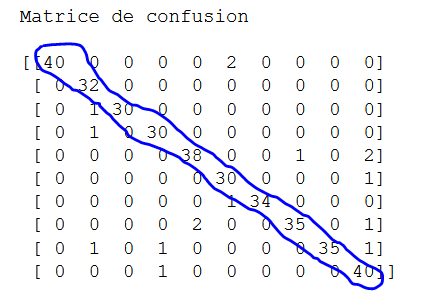

sauvegarde du modèle avec joblib

In [14]:
import joblib
filename = 'XGB'
joblib.dump(modele, filename)

['XGB']